基于R的关联规则算法：Apriori

# load packages

In [5]:
# if(!require(arules)){install.packages("arules")}
# if(!require(arulesViz)){install.packages("arulesViz")}

In [4]:
library('arules')
library('arulesViz')

Warning message:
"package 'arules' was built under R version 3.5.3"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesViz' was built under R version 3.5.3"Loading required package: grid


# load data: 杂货集数据

In [7]:
# arules 包自带数据集 Groceries
data(Groceries)
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

# explore data

In [10]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [13]:
class(Groceries)

[1] "transactions"
attr(,"package")
[1] "arules"

In [21]:
Groceries@itemInfo[1:20,]

labels,level2,level1
frankfurter,sausage,meat and sausage
sausage,sausage,meat and sausage
liver loaf,sausage,meat and sausage
ham,sausage,meat and sausage
meat,sausage,meat and sausage
finished products,sausage,meat and sausage
organic sausage,sausage,meat and sausage
chicken,poultry,meat and sausage
turkey,poultry,meat and sausage
pork,pork,meat and sausage


In [26]:
apply(Groceries@data[, 10:20], 2, 
     function(r) paste(Groceries@itemInfo[r, 'labels'], collapse = ', '))

[1] "whole milk, cereals"                                                                         
 [2] "tropical fruit, other vegetables, white bread, bottled water, chocolate"                     
 [3] "citrus fruit, tropical fruit, whole milk, butter, curd, yogurt, flour, bottled water, dishes"
 [4] "beef"                                                                                        
 [5] "frankfurter, rolls/buns, soda"                                                               
 [6] "chicken, tropical fruit"                                                                     
 [7] "butter, sugar, fruit/vegetable juice, newspapers"                                            
 [8] "fruit/vegetable juice"                                                                       
 [9] "packaged fruit/vegetables"                                                                   
[10] "chocolate"                                                                                   
[11] "specialty bar"

# Apriori

## 生成频繁项集

In [ ]:
support = 0.02 # 支持度 1000 * 0.02 = 20，项集至少出现20次才是频繁项集
confidence = 0.6 # 置信度
minlen = 1 # 频繁项集的最小长度
maxlen = 1 # 频繁项集的最大长度

### 频繁1项集

In [27]:
itemsets <- apriori(Groceries, parameter = list(minlen=1, maxlen=1, support=0.02,
                                               target='frequent itemsets'))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen            target   ext
      1 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1

Warning message in apriori(Groceries, parameter = list(minlen = 1, maxlen = 1, support = 0.02, :
"Mining stopped (maxlen reached). Only patterns up to a length of 1 returned!"

 done [0.02s].
writing ... [59 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [28]:
summary(itemsets)

set of 59 itemsets

most frequent items:
frankfurter     sausage         ham        meat     chicken     (Other) 
          1           1           1           1           1          54 

element (itemset/transaction) length distribution:sizes
 1 
59 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

summary of quality measures:
    support            count       
 Min.   :0.02105   Min.   : 207.0  
 1st Qu.:0.03015   1st Qu.: 296.5  
 Median :0.04809   Median : 473.0  
 Mean   :0.06200   Mean   : 609.8  
 3rd Qu.:0.07666   3rd Qu.: 754.0  
 Max.   :0.25552   Max.   :2513.0  

includes transaction ID lists: FALSE 

mining info:
      data ntransactions support confidence
 Groceries          9835    0.02          1

In [29]:
inspect(head(itemsets, by = 'support'))

    items              support   count
[1] {whole milk}       0.2555160 2513 
[2] {other vegetables} 0.1934926 1903 
[3] {rolls/buns}       0.1839349 1809 
[4] {soda}             0.1743772 1715 
[5] {yogurt}           0.1395018 1372 
[6] {bottled water}    0.1105236 1087 


### 频繁2项集

In [30]:
itemsets <- apriori(Groceries, parameter = list(minlen=2, maxlen=2, support=0.02,
                                               target='frequent itemsets'))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen            target   ext
      2 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2

Warning message in apriori(Groceries, parameter = list(minlen = 2, maxlen = 2, support = 0.02, :
"Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!"

 done [0.01s].
writing ... [61 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [32]:
summary(itemsets)

set of 61 itemsets

most frequent items:
      whole milk other vegetables           yogurt       rolls/buns 
              25               17                9                9 
            soda          (Other) 
               9               53 

element (itemset/transaction) length distribution:sizes
 2 
61 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support            count      
 Min.   :0.02003   Min.   :197.0  
 1st Qu.:0.02227   1st Qu.:219.0  
 Median :0.02613   Median :257.0  
 Mean   :0.02951   Mean   :290.3  
 3rd Qu.:0.03223   3rd Qu.:317.0  
 Max.   :0.07483   Max.   :736.0  

includes transaction ID lists: FALSE 

mining info:
      data ntransactions support confidence
 Groceries          9835    0.02          1

In [31]:
inspect(head(itemsets, by = 'support'))

    items                              support    count
[1] {other vegetables,whole milk}      0.07483477 736  
[2] {whole milk,rolls/buns}            0.05663447 557  
[3] {whole milk,yogurt}                0.05602440 551  
[4] {root vegetables,whole milk}       0.04890696 481  
[5] {root vegetables,other vegetables} 0.04738180 466  
[6] {other vegetables,yogurt}          0.04341637 427  


### 频繁项集

In [33]:
itemsets <- apriori(Groceries, parameter = list(minlen=1,support=0.02,
                                               target='frequent itemsets'))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [122 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [34]:
summary(itemsets)

set of 122 itemsets

most frequent items:
      whole milk other vegetables           yogurt       rolls/buns 
              28               20               11               10 
            soda          (Other) 
              10              108 

element (itemset/transaction) length distribution:sizes
 1  2  3 
59 61  2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.533   2.000   3.000 

summary of quality measures:
    support            count       
 Min.   :0.02003   Min.   : 197.0  
 1st Qu.:0.02453   1st Qu.: 241.2  
 Median :0.03045   Median : 299.5  
 Mean   :0.04511   Mean   : 443.7  
 3rd Qu.:0.05168   3rd Qu.: 508.2  
 Max.   :0.25552   Max.   :2513.0  

includes transaction ID lists: FALSE 

mining info:
      data ntransactions support confidence
 Groceries          9835    0.02          1

In [35]:
inspect(head(itemsets, by = 'support'))

    items              support   count
[1] {whole milk}       0.2555160 2513 
[2] {other vegetables} 0.1934926 1903 
[3] {rolls/buns}       0.1839349 1809 
[4] {soda}             0.1743772 1715 
[5] {yogurt}           0.1395018 1372 
[6] {bottled water}    0.1105236 1087 


## 规则生成与可视化

In [36]:
rules <- apriori(Groceries, parameter = list(minlen=1,support=0.001,
                                               confidence=0.6, target='rules'))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [2918 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [37]:
summary(rules)

set of 2918 rules

rule length distribution (lhs + rhs):sizes
   2    3    4    5    6 
   3  490 1765  626   34 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.000   4.000   4.068   4.000   6.000 

summary of quality measures:
    support           confidence          lift            count      
 Min.   :0.001017   Min.   :0.6000   Min.   : 2.348   Min.   :10.00  
 1st Qu.:0.001118   1st Qu.:0.6316   1st Qu.: 2.668   1st Qu.:11.00  
 Median :0.001220   Median :0.6818   Median : 3.168   Median :12.00  
 Mean   :0.001480   Mean   :0.7028   Mean   : 3.450   Mean   :14.55  
 3rd Qu.:0.001525   3rd Qu.:0.7500   3rd Qu.: 3.692   3rd Qu.:15.00  
 Max.   :0.009354   Max.   :1.0000   Max.   :18.996   Max.   :92.00  

mining info:
      data ntransactions support confidence
 Groceries          9835   0.001        0.6

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


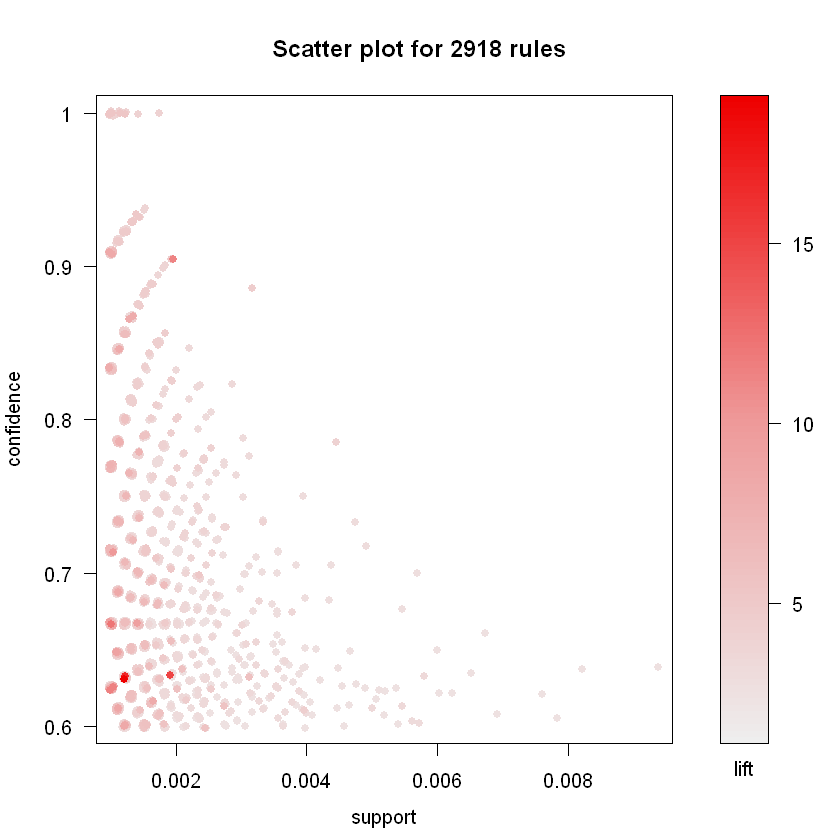

In [38]:
plot(rules)

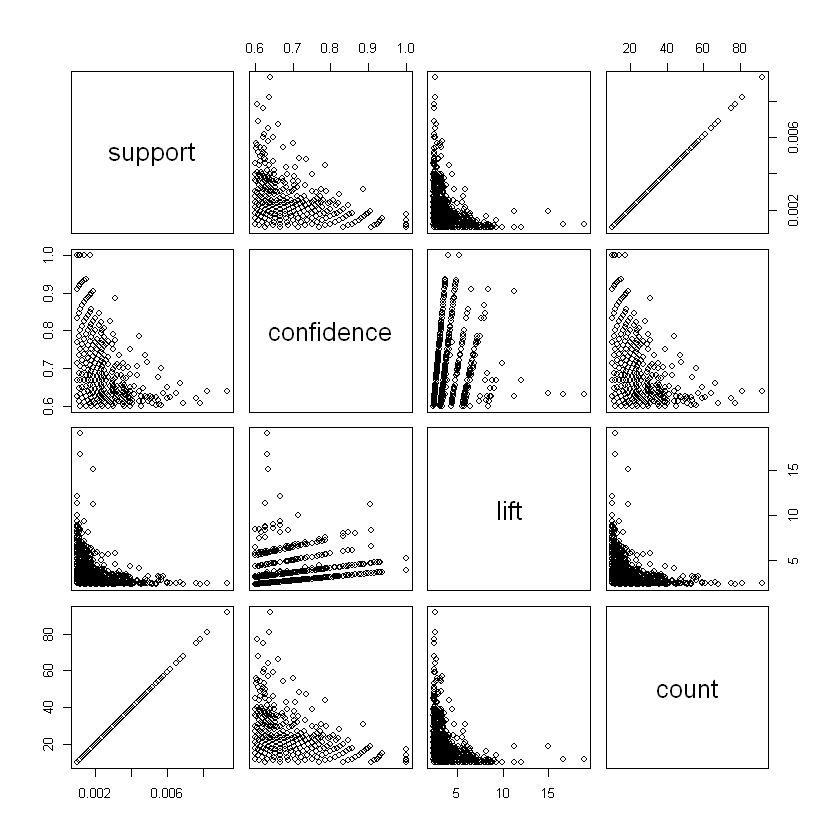

In [39]:
plot(rules@quality)

In [40]:
inspect(head(sort(rules, by = 'lift'), 10))

     lhs                        rhs                      support confidence      lift count
[1]  {Instant food products,                                                               
      soda}                  => {hamburger meat}     0.001220132  0.6315789 18.995654    12
[2]  {soda,                                                                                
      popcorn}               => {salty snack}        0.001220132  0.6315789 16.697793    12
[3]  {ham,                                                                                 
      processed cheese}      => {white bread}        0.001931876  0.6333333 15.045491    19
[4]  {tropical fruit,                                                                      
      other vegetables,                                                                    
      yogurt,                                                                              
      white bread}           => {butter}             0.001016777  0.6666667 12.0

In [41]:
# confidence > 0.9
confidenctRules <- rules[quality(rules)$confidence > 0.9]
confidenctRules

set of 127 rules 

In [43]:
plot(confidenctRules, method='matrix', measure=c('lift', 'confidence'), control=list(reorder=TRUE))

ERROR: Error in matrix_int(rules, measure, control, ...): Unknown reorder method: 'TRUE' Valid reorder methods are: 'none', 'measure', 'support/confidence', 'similarity'


Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Graph for 5 rules
nodeColors	 =  c("#66CC6680", "#9999CC80")
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EEB

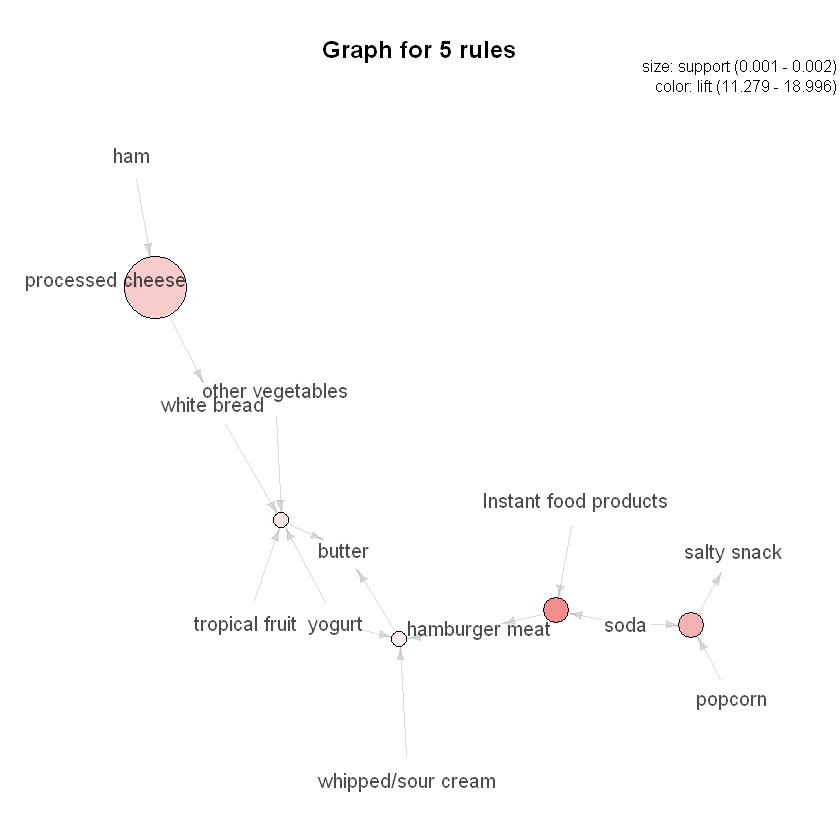

In [44]:
highLiftRules <- head(sort(rules, by = 'lift'), 5)
plot(highLiftRules, method='graph', control=list(type='items'))

In [ ]:
associationData <- read.transactions("http://user.informatik.uni-goettingen.de/~sherbold/AssociationRules.csv",rm.duplicates = FALSE,format="basket",sep=" ")
associationData

#summary(associationData2)

#https://www.youtube.com/watch?v=b5hgDPa7a2k
#a=10000*98 #rows or transaction*column or item 
#b=0.1000643 #density can be found from summary 
#c=a*b #so total item must be equal to most frequent items  ( 4948  +  3699   + 3308  +  3035  +  2831  + 80242 )

inspect(associationData[1:3])#show 1st to 3rd data
itemFrequency(associationData[,1])#show 1st item frequency, c*0.1718 = 16847.23 
itemFrequency(associationData[,1:6])
itemFrequencyPlot(associationData,support=0.45)
itemFrequencyPlot(associationData,topN=5)
#so support is how a item is used in total transaction. the more it availave in transactions its support 
#is increaisng

#confidence-> suppose someone buys item A and B, then how likely that he will also buy C. 
results <- apriori(associationData)
results <- apriori(associationData,parameter = list(support=0.007,confidence=0.25,minlen=2))
summary(results)
results <- apriori(associationData,parameter = list(support=0.07,confidence=0.4,minlen=2))
summary(results)
inspect(results[1:2])
# lift is how much more likely an item is to be purchased relative to its general purchse rate given that you know anotehr item has been purchased 
#higher lift is always good

#the 1st and 3rd quartiles give a sense of the spread of the data, especially when compared to the minimum, maximum, and median

#Here is how fivenum() calculates the 1st and 3rd quartiles.
#Sort your data from smallest to largest
#Find the median.  If your data set has an odd number of data, then the median is the datum such that the number of data above the median is the same as the number of data below the median.  If your data set has an even number, n, of data, the median is the average of the (n/2)th and (n/2 + 1)th largest data.
#Find the set, L, of data below the median.  The 1st quartile is the median of L.
#Find the set, U, of data above the median.  The 3rd quartile is the median of U.
#summary() uses the quantile() function to calculate the 25% and 75% quantiles as the 1st and 3rd quartiles.  Thus, let's discuss how quantile() calculates quantiles.  
#more at
#https://chemicalstatistician.wordpress.com/2013/08/12/exploratory-data-analysis-the-5-number-summary-two-different-methods-in-r-2/


inspect(sort(results,by="lift")[1:4]) #by may support,confidence

#Visualizing rules
#https://www.youtube.com/watch?v=91CmrpD-4Fw

library("arulesViz")

plot(results)
plot(results,interactive=TRUE)#nice one :) 


plot(results,method="grouped")
#below code needs about 7-10 minutes to give output in this dataset of 11709 rules
#plot(results,method = "grap", control = list(type="items"))

#reduced rules and it takes only few seconds
plot(results[1:16],method = "grap", control = list(type="items"))